In [1]:
!pip install imageio
!pip install gymnasium
!pip install gymnasium[toy-text]
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# save video
# https://stackoverflow.com/questions/60765613/how-to-show-episode-in-rendered-openai-gym-environment
# Credit to ChatGPT
import os
import imageio
import numpy as np
from PIL import Image
import PIL.ImageDraw as ImageDraw
import matplotlib.pyplot as plt    
import gymnasium
import numpy as np
import cv2
from IPython.display import clear_output
import optuna

In [3]:
N_EPISODES = 1200
REWARD_AVG_EPS = 100

In [4]:
#env = gymnasium.make("CliffWalking-v0", render_mode = "rgb_array")# https://gymnasium.farama.org/environments/toy_text/cliff_walking/

In [23]:
def _label_with_episode_number(frame, episode_num):
    im = Image.fromarray(frame)
    drawer = ImageDraw.Draw(im)
    if np.mean(im) < 128:
        text_color = (255,255,255)
    else:
        text_color = (0,0,0)
    drawer.text((im.size[0]/20,im.size[1]/18), f'Episode: {episode_num+1}', fill=text_color)
    return im

In [24]:
env = gymnasium.make("CliffWalking-v0", render_mode = "rgb_array")# https://gymnasium.farama.org/environments/toy_text/cliff_walking/
Q = np.zeros((48, 4))
terminated = False
epsilon = 0.8
alpha = 0.4
gamma = 0.8
DECAY_RATE = 0.01
EPSILON_FLOOR = 0.01
frames = []
rewardEp = []
movingAvg = []
for episode in range(N_EPISODES):
  print("Episode " + str(episode))
  print("Epsilon = " + str(epsilon))
  obs, _ = env.reset()
  totalReward = 0
  while not terminated:
    if np.random.random() < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[obs, :])
    newObs, reward, terminated, truncated, _ = env.step(action)
    totalReward += reward
    Q[obs, action] = Q[obs, action] + alpha * (reward + gamma * np.max(Q[newObs, :]) - Q[obs, action])
    obs = newObs
    frame = env.render()
    frames.append(_label_with_episode_number(frame, episode_num = episode))
  print("Reward = " + str(totalReward))
  rewardEp.append(totalReward)
  if episode > REWARD_AVG_EPS - 1:
    movingAvgReward = np.mean(rewardEp[-REWARD_AVG_EPS:])
    movingAvg.append(movingAvgReward)
    print("MovingAvgReward = " + str(movingAvgReward))
  else:
    movingAvgReward = 0
    movingAvg.append(None)
  epsilon *= 1 - DECAY_RATE
  if epsilon < EPSILON_FLOOR:
      epsilon = EPSILON_FLOOR
  terminated = False
  # Plot the reward
  plt.figure(0)
  plt.xlabel('Episode')
  plt.ylabel('Reward')
  plt.plot(np.array(rewardEp[:episode]))
  plt.plot(np.array(movingAvg[:episode]), color = 'red')
  plt.figure(1)
  plt.xlabel('Episode')
  plt.ylabel('-Reward (log scale)')
  plt.plot(-1*np.array(rewardEp[:episode]))
  if episode > REWARD_AVG_EPS - 1:
      # thanks to ChatGPT
      plt.plot(np.where(np.array([isinstance(x, float) for x in movingAvg]), np.array([x * -1 if isinstance(x, float) else x for x in movingAvg]), movingAvg), color = 'red')
  plt.yscale('log')
  plt.show()
  if episode < N_EPISODES - 1:
   clear_output(wait = True)
#imageio.mimwrite(os.path.join('./videos/', 'q_learning.gif'), frames, fps=60000)

Episode 19
Epsilon = 0.6609348990684691


KeyboardInterrupt: 

In [7]:
# Specify the video frame size
frame_width, frame_height = frames[0].size  # Assuming all images have the same size

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can change the codec as needed
out = cv2.VideoWriter('./videos/output_video.mp4', fourcc, 25.0, (frame_width, frame_height))

# Loop through each image
for pil_image in frames:
    # Convert PIL image to NumPy array
    np_image = np.array(pil_image)
    # Convert RGB to BGR (OpenCV uses BGR)
    frame = cv2.cvtColor(np_image, cv2.COLOR_RGB2BGR)
    out.write(frame)

# Release the VideoWriter object
out.release()

In [8]:
np.save("Q_matrix_new.npy", Q)

In [9]:
Q

array([[  -4.76430487,   -4.75539156,   -4.75357504,   -4.76231459],
       [  -4.75034772,   -4.7111359 ,   -4.71434028,   -4.77065782],
       [  -4.6773077 ,   -4.64706735,   -4.64526656,   -4.71796242],
       [  -4.6066154 ,   -4.5640335 ,   -4.56455566,   -4.67654109],
       [  -4.53126896,   -4.45873491,   -4.45895766,   -4.61402807],
       [  -4.44374346,   -4.32484395,   -4.32505109,   -4.55927342],
       [  -4.28618237,   -4.15804442,   -4.16003807,   -4.43904896],
       [  -4.13332815,   -3.94896012,   -3.94985549,   -4.29796539],
       [  -3.9409066 ,   -3.68744887,   -3.68780751,   -4.11120708],
       [  -3.64821003,   -3.36081677,   -3.36116063,   -3.93466169],
       [  -3.20096969,   -2.9518712 ,   -2.95187214,   -3.67256328],
       [  -2.90521246,   -2.80270962,   -2.43999829,   -3.23002147],
       [  -4.77462078,   -4.72508459,   -4.72508678,   -4.75998969],
       [  -4.76223284,   -4.65639283,   -4.65639275,   -4.77196388],
       [  -4.70478361,   -4.570498

# Testing

In [19]:
env = gymnasium.make("CliffWalking-v0", render_mode = "rgb_array")

In [20]:
N_EPISODES = 1000
terminated = False
REWARD_AVG_EPS = 100

Episode 999
Reward = -13


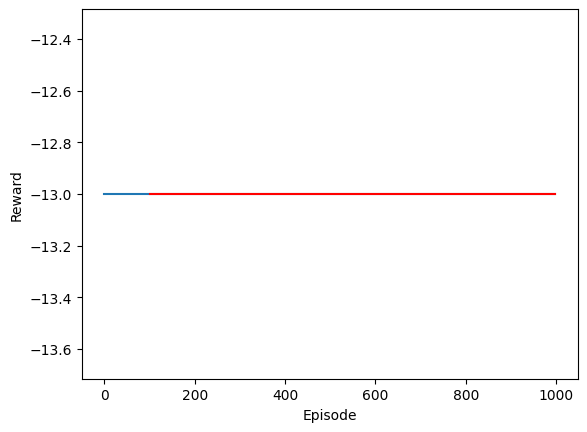

In [21]:
frames = []
rewardEp = []
movingAvg = []
for episode in range(N_EPISODES):
  print("Episode " + str(episode))
  obs, _ = env.reset()
  totalReward = 0
  while not terminated:
    #print(str(obs) + " " + str(action))
    action = np.argmax(Q[obs, :])
    newObs, reward, terminated, truncated, _ = env.step(action)
    totalReward += reward
    obs = newObs
    frame = env.render()
    frames.append(_label_with_episode_number(frame, episode_num = episode))
  print("Reward = " + str(totalReward))
  rewardEp.append(totalReward)
  if episode > REWARD_AVG_EPS - 1:
    movingAvgReward = np.mean(rewardEp[-REWARD_AVG_EPS:])
    movingAvg.append(movingAvgReward)
  else:
    movingAvgReward = 0
    movingAvg.append(None)
  epsilon *= 1 - DECAY_RATE
  terminated = False
  # # Plot the reward
  plt.figure(0)
  plt.xlabel('Episode')
  plt.ylabel('Reward')
  plt.plot(np.array(rewardEp[:episode]))
  plt.plot(np.array(movingAvg[:episode]), color = 'red')
  plt.show()
  if episode < N_EPISODES - 1:
    clear_output(wait = True)
#imageio.mimwrite(os.path.join('./videos/', 'q_learning.gif'), frames, fps=60000)

In [22]:
# Specify the video frame size
frame_width, frame_height = frames[0].size  # Assuming all images have the same size

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can change the codec as needed
out = cv2.VideoWriter('./videos/output_video_test.mp4', fourcc, 25.0, (frame_width, frame_height))

# Loop through each image
for pil_image in frames:
    # Convert PIL image to NumPy array
    np_image = np.array(pil_image)
    # Convert RGB to BGR (OpenCV uses BGR)
    frame = cv2.cvtColor(np_image, cv2.COLOR_RGB2BGR)
    out.write(frame)

# Release the VideoWriter object
out.release()